In [226]:
# Import useful python libraries, handle warnings and set parameters for matplotlib diagrams
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=SettingWithCopyWarning)

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['figure.frameon'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams["font.family"] = "monospace";

In [264]:
# Load the dataset into the notebook
data = pd.read_csv("Race_data.csv")
data.shape

(6314, 24)

In [265]:
# View the first 5 entries in the dataset
data.head()

,Race_ID,Race_Name,Driver_ID,Driver_Ref,Pit_Stop_Count,Pitted_On_Lap,Pit_Stop_Duration,Avg_Pit_Stop_Secs,Grid,Constructor_ID,...,Circuit_Country,Altitude_Metres,Race_Year,Status_ID,Race_Finish_Status,Fastest_Lap_Speed_KMH,Driver_Total_Points,Driver_Overall_Standing,Driver_Total_Wins,Avg_Lap_Time_Secs
0,962,Singapore Grand Prix,815,perez,2.0,25,28.742,28,17.0,10,...,Singapore,18,2016,1,Finished,163.508,66,8,0,115.0
1,968,Abu Dhabi Grand Prix,13,massa,2.0,30,21.539,21,10.0,3,...,UAE,3,2016,1,Finished,189.206,53,11,0,107.0
2,1020,German Grand Prix,825,kevin_magnussen,5.0,45,20.285,20,12.0,210,...,Germany,103,2019,1,Finished,212.450,18,13,0,97.0
3,897,Abu Dhabi Grand Prix,13,massa,2.0,38,22.315,22,7.0,6,...,UAE,3,2013,1,Finished,189.615,106,8,0,108.0
4,997,Austrian Grand Prix,842,gasly,1.0,15,22.011,22,12.0,5,...,Austria,678,2018,11,+1 Lap,224.327,18,13,0,70.0


In [266]:
# Check if dataset contains missing values
data.isnull().sum()

Race_ID                    0
Race_Name                  0
Driver_ID                  0
Driver_Ref                 0
Pit_Stop_Count             1
Pitted_On_Lap              0
Pit_Stop_Duration          0
Avg_Pit_Stop_Secs          0
Grid                       1
Constructor_ID             0
Constructor_Nationality    0
Constructor_Name           0
Circuit_ID                 0
Circuit_Name               0
Circuit_Country            0
Altitude_Metres            0
Race_Year                  0
Status_ID                  0
Race_Finish_Status         0
Fastest_Lap_Speed_KMH      0
Driver_Total_Points        0
Driver_Overall_Standing    0
Driver_Total_Wins          0
Avg_Lap_Time_Secs          0
dtype: int64

In [267]:
# Remove rows with missing values
data = data.dropna()
data.isnull().sum()

Race_ID                    0
Race_Name                  0
Driver_ID                  0
Driver_Ref                 0
Pit_Stop_Count             0
Pitted_On_Lap              0
Pit_Stop_Duration          0
Avg_Pit_Stop_Secs          0
Grid                       0
Constructor_ID             0
Constructor_Nationality    0
Constructor_Name           0
Circuit_ID                 0
Circuit_Name               0
Circuit_Country            0
Altitude_Metres            0
Race_Year                  0
Status_ID                  0
Race_Finish_Status         0
Fastest_Lap_Speed_KMH      0
Driver_Total_Points        0
Driver_Overall_Standing    0
Driver_Total_Wins          0
Avg_Lap_Time_Secs          0
dtype: int64

In [268]:
# Check if dataset contains duplicate values 
data.duplicated().sum()

0

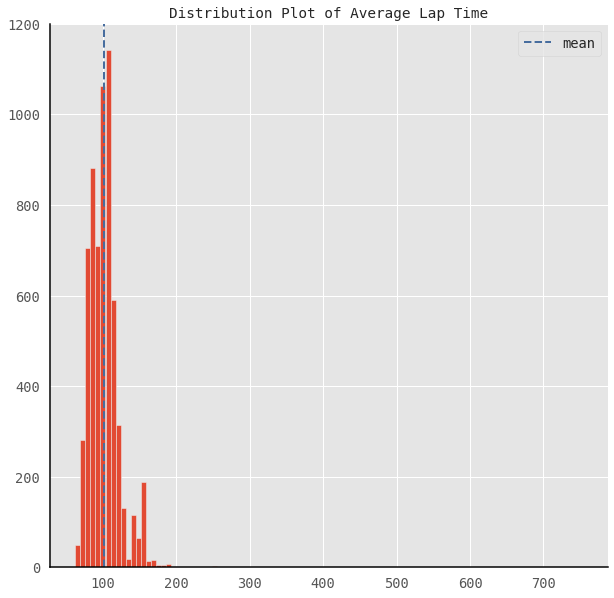

In [232]:
# Plot histogram of the target variable
data.hist(column='Avg_Lap_Time_Secs', figsize=(10, 10), bins=100, legend=True)
mean_cut = plt.axvline(data["Avg_Lap_Time_Secs"].mean(), color="#476d9e", linestyle="--", linewidth=2, label="mean")
plt.legend(handles = [mean_cut])
plt.title("Distribution Plot of Average Lap Time")
plt.style.use('ggplot')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

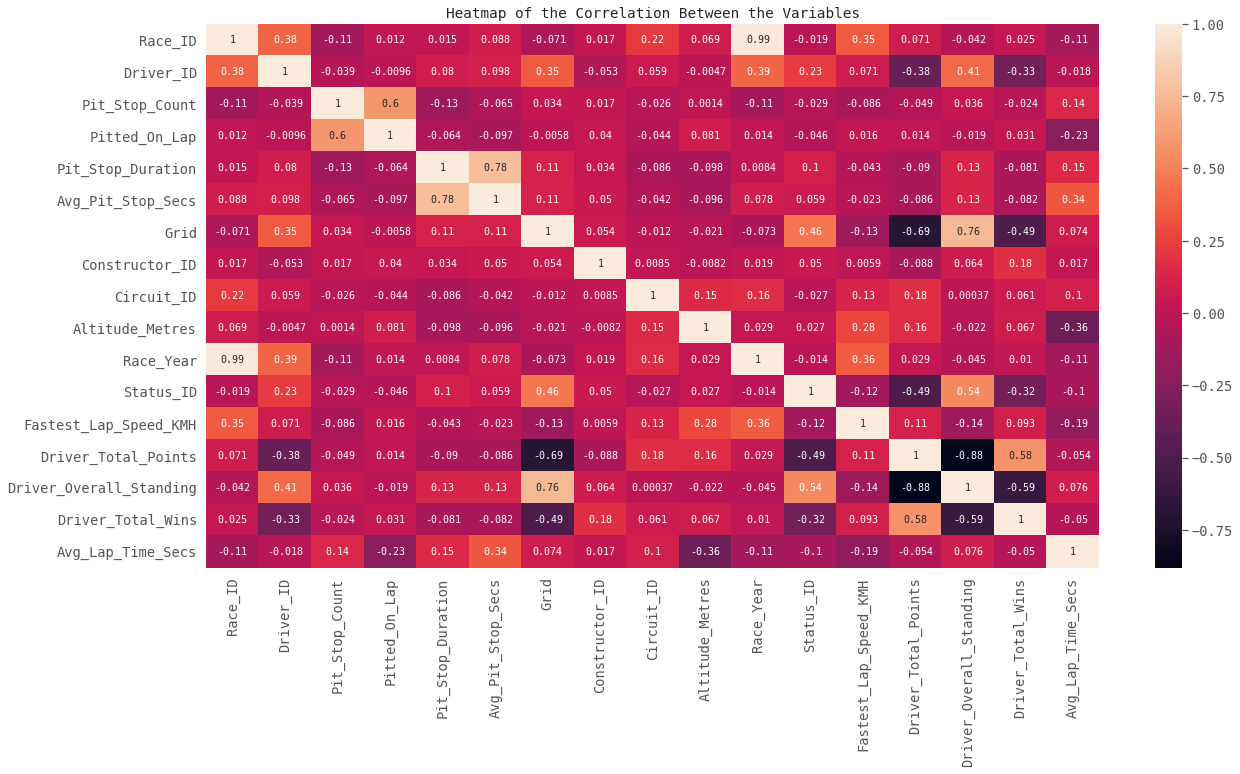

In [233]:
# Plot heatmap of the spearman's correlation between the dataset features
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(method="spearman"), annot=True)
plt.title("Heatmap of the Correlation Between the Variables")
plt.show

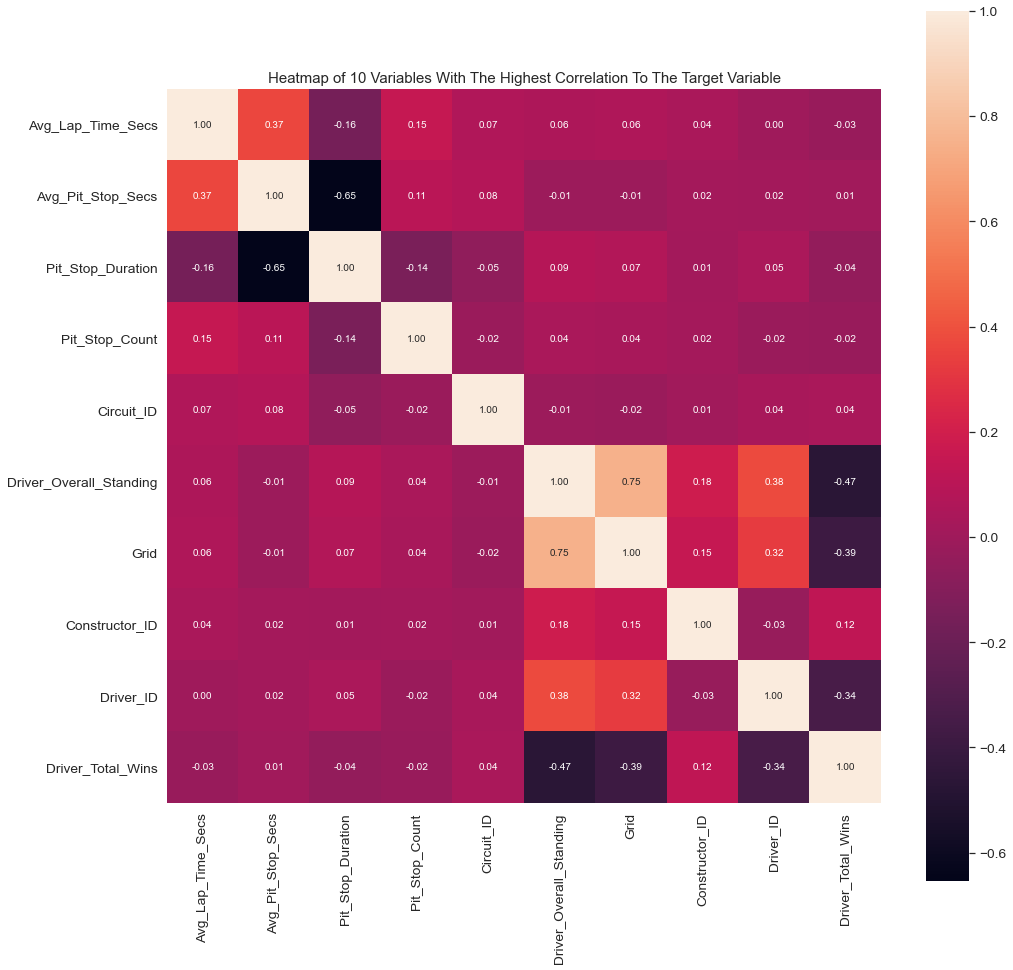

In [234]:
# Plot heatmap of 10 feature with the highest spearman's correlation to the target features
plt.figure(figsize=(16,16))
columns = data.corr(method="spearman").nlargest(10, 'Avg_Lap_Time_Secs')['Avg_Lap_Time_Secs'].index
correlation_matrix = np.corrcoef(data[columns].values.T)
sns.set(font_scale=1.25)
heat_map = sns.heatmap(correlation_matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
plt.title("Heatmap of 10 Variables With The Highest Correlation To The Target Variable")
plt.show()

In [269]:
# Check data type of each feature
data.dtypes

Race_ID                      int64
Race_Name                   object
Driver_ID                    int64
Driver_Ref                  object
Pit_Stop_Count             float64
Pitted_On_Lap                int64
Pit_Stop_Duration          float64
Avg_Pit_Stop_Secs            int64
Grid                       float64
Constructor_ID               int64
Constructor_Nationality     object
Constructor_Name            object
Circuit_ID                   int64
Circuit_Name                object
Circuit_Country             object
Altitude_Metres              int64
Race_Year                    int64
Status_ID                    int64
Race_Finish_Status          object
Fastest_Lap_Speed_KMH      float64
Driver_Total_Points          int64
Driver_Overall_Standing      int64
Driver_Total_Wins            int64
Avg_Lap_Time_Secs          float64
dtype: object

In [270]:
# Drop redundant features from the dataset
data = data.drop(["Race_ID", "Driver_ID", "Constructor_Nationality", "Constructor_ID", "Circuit_ID", "Circuit_Country", "Status_ID"], axis=1)
data.shape

(6312, 17)

In [271]:
data["Grid"] = data["Grid"].astype(object)
data["Race_Year"] = data["Grid"].astype(object)

In [272]:
cat_cols = []
num_cols = []
for i in data.columns:
    if data[i].dtype == object:
        cat_cols.append(i)
    else:
        num_cols.append(i)
cat_cols, num_cols

(['Race_Name',
  'Driver_Ref',
  'Grid',
  'Constructor_Name',
  'Circuit_Name',
  'Race_Year',
  'Race_Finish_Status'],
 ['Pit_Stop_Count',
  'Pitted_On_Lap',
  'Pit_Stop_Duration',
  'Avg_Pit_Stop_Secs',
  'Altitude_Metres',
  'Fastest_Lap_Speed_KMH',
  'Driver_Total_Points',
  'Driver_Overall_Standing',
  'Driver_Total_Wins',
  'Avg_Lap_Time_Secs'])

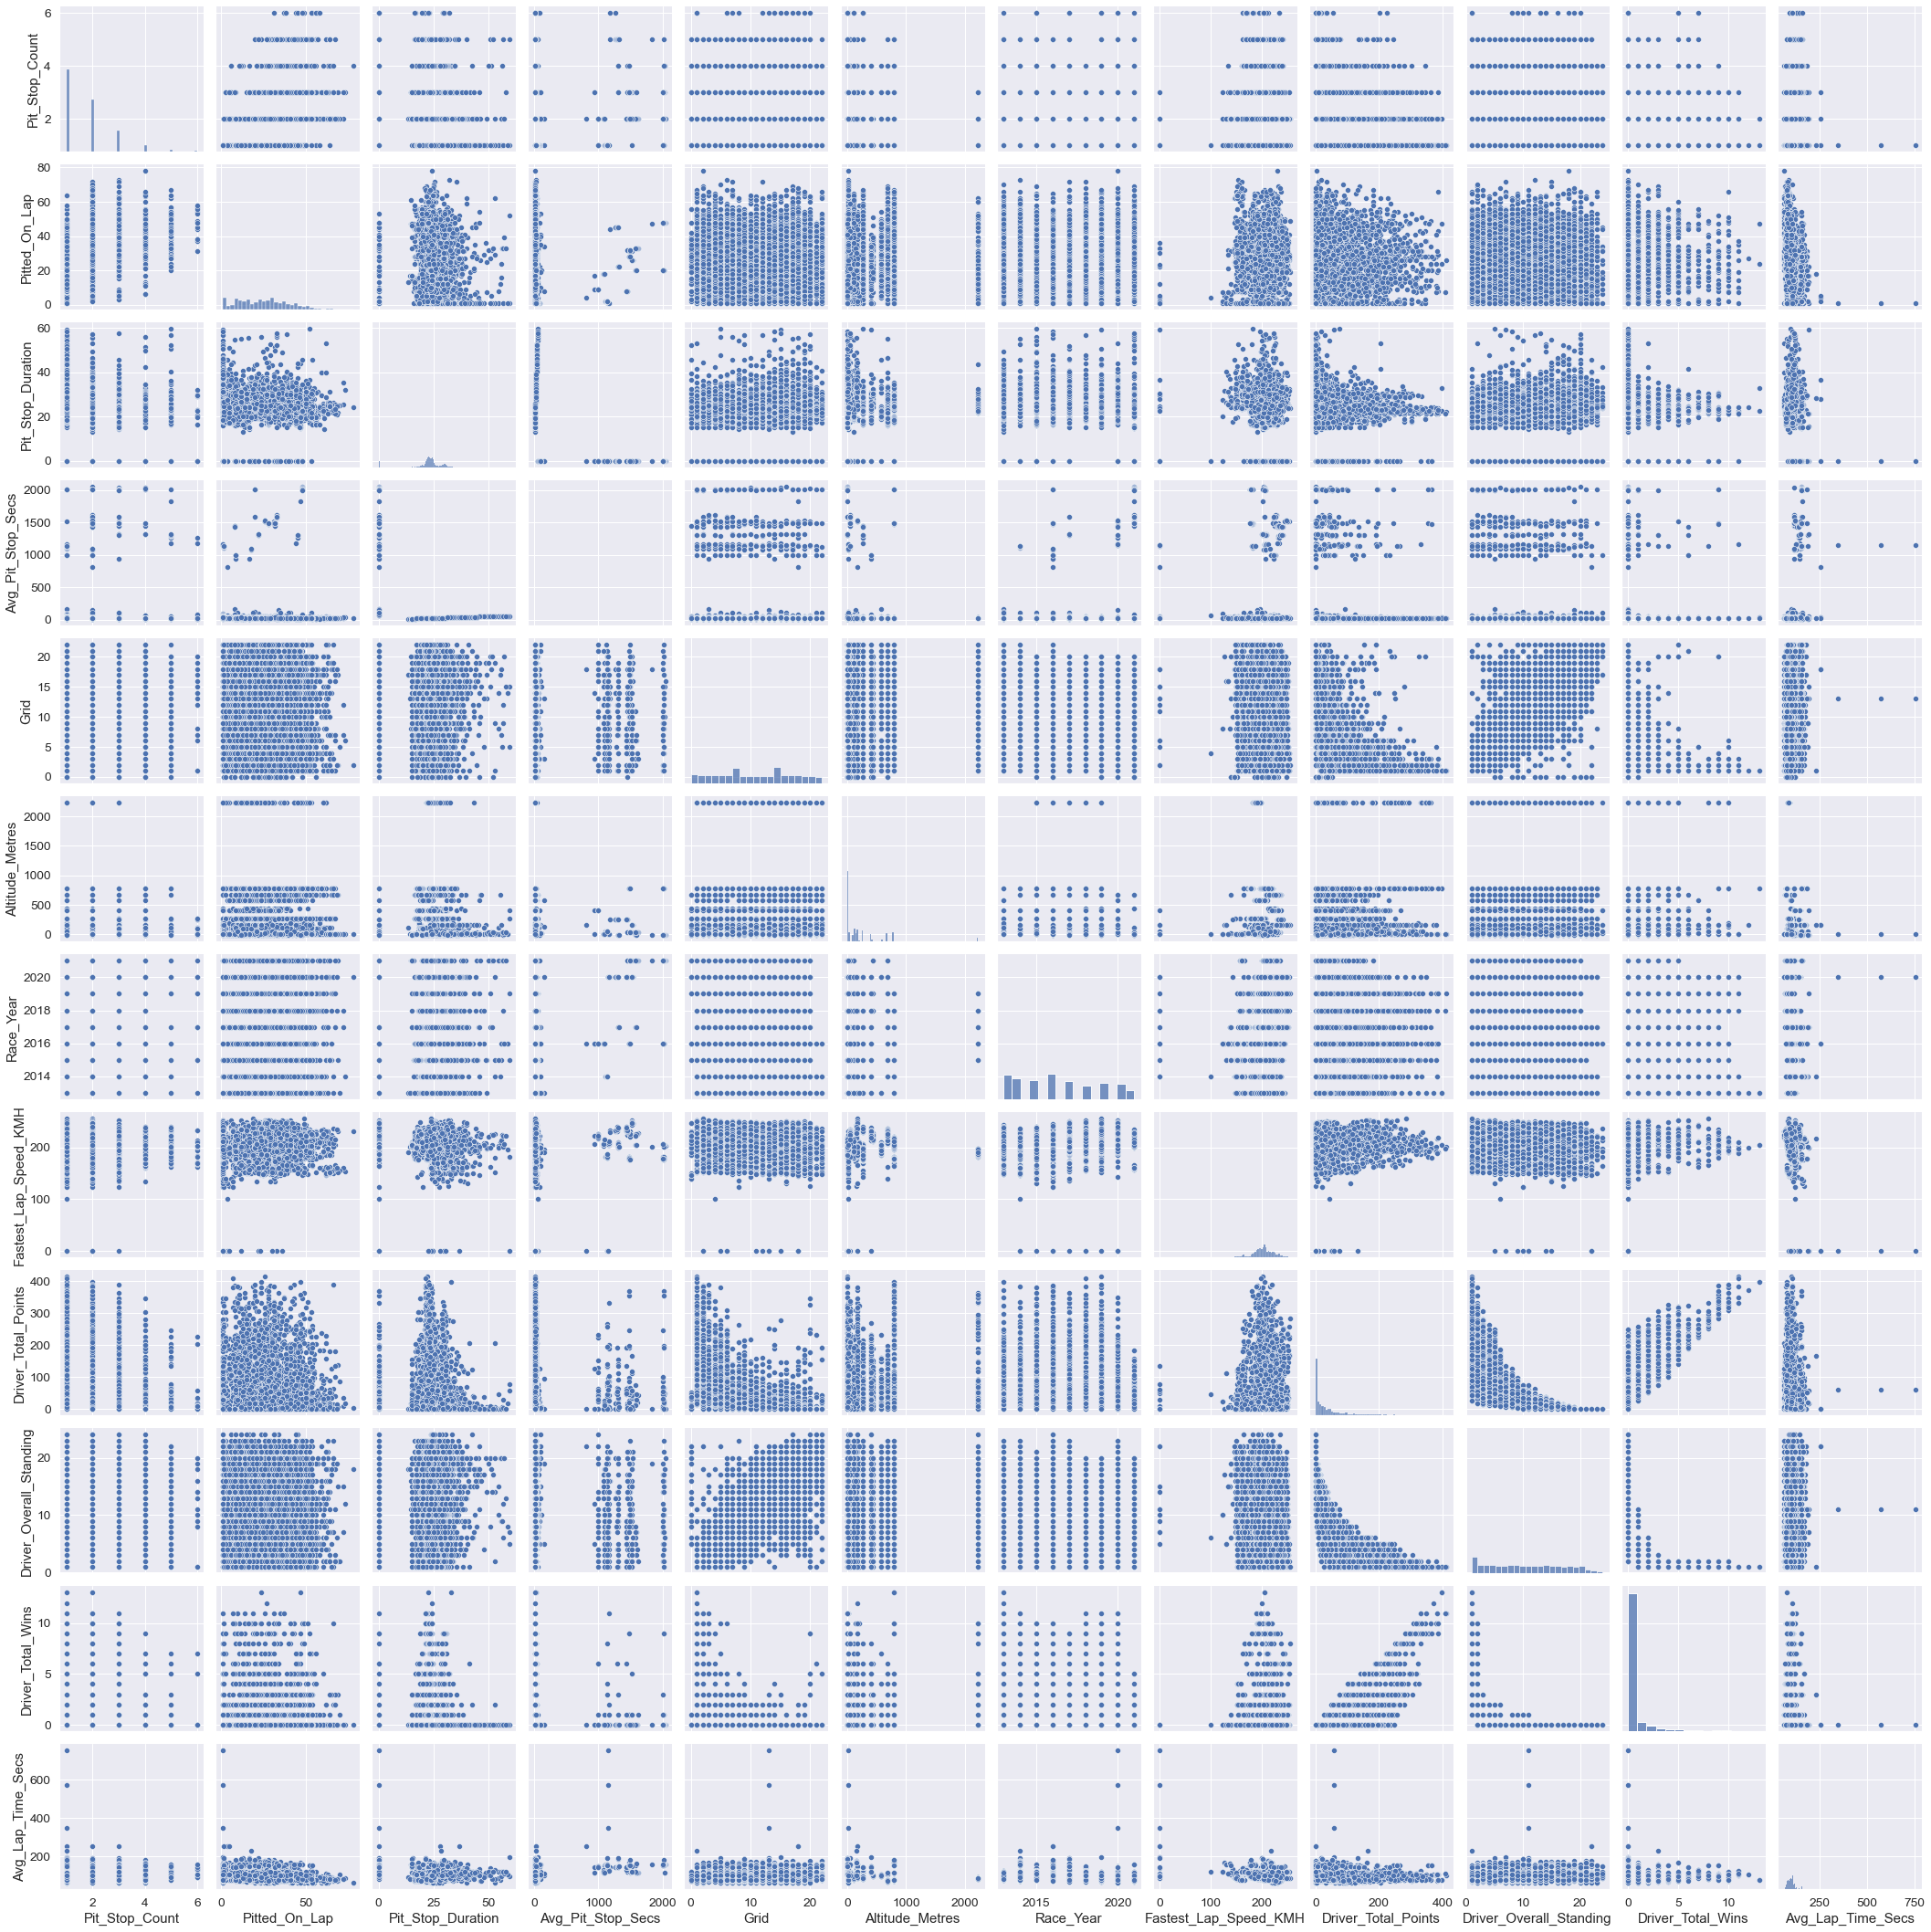

In [55]:
# Plot the pairwise relationship between the dataset features
sns.pairplot(data)
plt.style.use('ggplot')
plt.show()

In [274]:
# Create a function to detect data points/rows with more than two outliers
def detect_outliers(df, features):
    outlier_indices = [];
    if type(features) == list:
        for c in features:
            Q1 = np.percentile(df[c], 25)
            Q3 = np.percentile(df[c], 75)
            IQR = Q3 - Q1
            outlier_step = IQR * 1.5
            outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
            outlier_indices.extend(outlier_list_col)
        outlier_indices = Counter(outlier_indices)
        multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)  
        #return outlier_indices
        return multiple_outliers
    

    else:
        Q1 = np.percentile(df[features], 25)
        Q3 = np.percentile(df[features], 75)
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        outlier_list_col = df[(df[features] < Q1 - outlier_step) | (df[features] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    
        return outlier_indices

In [275]:
data.describe()

,Pit_Stop_Count,Pitted_On_Lap,Pit_Stop_Duration,Avg_Pit_Stop_Secs,Altitude_Metres,Fastest_Lap_Speed_KMH,Driver_Total_Points,Driver_Overall_Standing,Driver_Total_Wins,Avg_Lap_Time_Secs
count,6312.000000,6312.000000,6312.000000,6312.000000,6312.000000,6312.000000,6312.000000,6312.000000,6312.000000,6312.000000
mean,1.741286,24.768853,23.737671,69.907161,215.486534,201.308116,48.284221,10.955165,0.476869,101.266581
std,0.927794,14.571869,6.446674,253.256026,383.527911,22.687196,70.280967,6.168247,1.507002,22.507344
min,1.000000,1.000000,0.000000,13.000000,-7.000000,0.000000,0.000000,1.000000,0.000000,62.000000
25%,1.000000,13.000000,22.033000,22.000000,7.000000,190.623000,2.000000,6.000000,0.000000,86.000000
50%,1.000000,25.000000,23.595500,23.000000,103.000000,202.685000,19.000000,11.000000,0.000000,100.000000
75%,2.000000,35.000000,25.693000,26.000000,264.000000,214.556750,60.000000,16.000000,0.000000,109.000000
max,6.000000,78.000000,59.555000,2048.000000,2227.000000,255.014000,413.000000,24.000000,13.000000,753.000000


In [276]:
# Drop rows containng more than two outliers
data = data.drop(detect_outliers(data, num_cols), axis=0).reset_index(drop=True)
data.shape

(5894, 17)

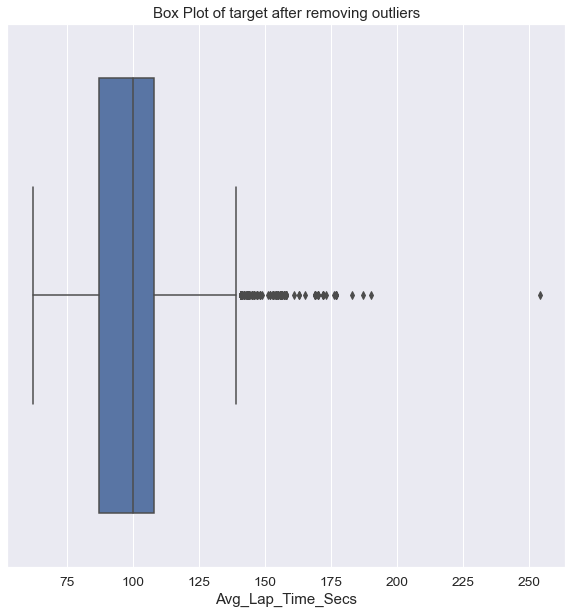

In [277]:
plt.title("Box Plot of target after removing outliers")
sns.boxplot(data["Avg_Lap_Time_Secs"])
plt.show()

In [278]:
# Encode the Race_Name and Circuit_Name features in preparation to fit the input data obtained from the app into the model 
data["Race_Name"] = data["Race_Name"].replace(['Singapore Grand Prix', 'Abu Dhabi Grand Prix','German Grand Prix', 
                                                   'Austrian Grand Prix', 'Japanese Grand Prix', 'Italian Grand Prix', 
                                                   'Chinese Grand Prix', 'United States Grand Prix', 'Spanish Grand Prix',
                                                   'Indian Grand Prix', 'Monaco Grand Prix', 'British Grand Prix',
                                                   '70th Anniversary Grand Prix', 'Mexican Grand Prix','Canadian Grand Prix',
                                                   'Portuguese Grand Prix', 'Hungarian Grand Prix', 'Brazilian Grand Prix',
                                                   'Belgian Grand Prix', 'Malaysian Grand Prix', 'Eifel Grand Prix',
                                                   'Korean Grand Prix', 'Bahrain Grand Prix', 'Australian Grand Prix',
                                                   'Azerbaijan Grand Prix', 'Turkish Grand Prix', 'Russian Grand Prix', 
                                                   'European Grand Prix', 'French Grand Prix', 'Emilia Romagna Grand Prix', 
                                                   'Styrian Grand Prix', 'Sakhir Grand Prix', 'Tuscan Grand Prix'], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]).astype(int)

data["Circuit_Name"] = data["Circuit_Name"].replace(['Marina Bay Street Circuit', 'Yas Marina Circuit', 'Hockenheimring',
                                                         'Red Bull Ring', 'Suzuka Circuit', 'Autodromo Nazionale di Monza', 
                                                         'Shanghai International Circuit', 'Circuit of the Americas', 
                                                         'Circuit de Barcelona-Catalunya', 'Buddh International Circuit', 
                                                         'Circuit de Monaco', 'Silverstone Circuit', 'N++rburgring', 
                                                         'Aut+¦dromo Hermanos Rodr+¡guez', 'Circuit Gilles Villeneuve',
                                                         'Aut+¦dromo Internacional do Algarve', 'Hungaroring',
                                                         'Aut+¦dromo Jos+® Carlos Pace', 'Circuit de Spa-Francorchamps',
                                                         'Sepang International Circuit', 'Korean International Circuit',
                                                         'Bahrain International Circuit', 'Albert Park Grand Prix Circuit',
                                                         'Baku City Circuit', 'Istanbul Park', 'Sochi Autodrom',
                                                         'Circuit Paul Ricard', 'Autodromo Enzo e Dino Ferrari',
                                                         'Autodromo Internazionale del Mugello'], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]).astype(int)

In [260]:
data_copy = data

In [279]:
# One-hot encode categorical columns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(data[cat_cols])
encoded_cols = list(encoder.get_feature_names(cat_cols))
data[encoded_cols] = encoder.transform(data[cat_cols])


In [280]:
data = data[encoded_cols + num_cols]
data.shape

(5894, 248)

In [281]:
data.head()

,Race_Name_1,Race_Name_2,Race_Name_3,Race_Name_4,Race_Name_5,Race_Name_6,Race_Name_7,Race_Name_8,Race_Name_9,Race_Name_10,...,Pit_Stop_Count,Pitted_On_Lap,Pit_Stop_Duration,Avg_Pit_Stop_Secs,Altitude_Metres,Fastest_Lap_Speed_KMH,Driver_Total_Points,Driver_Overall_Standing,Driver_Total_Wins,Avg_Lap_Time_Secs
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,25,28.742,28,18,163.508,66,8,0,115.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,30,21.539,21,3,189.206,53,11,0,107.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,45,20.285,20,103,212.450,18,13,0,97.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,38,22.315,22,3,189.615,106,8,0,108.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,15,22.011,22,678,224.327,18,13,0,70.0


In [282]:
# Create separate dataframe from input and target features
input_df = data.drop("Avg_Lap_Time_Secs", axis=1)
target_df = data["Avg_Lap_Time_Secs"]

In [283]:
# Split dataset into training and testing 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_df, target_df, test_size=0.25, random_state=42)
x_train.shape, y_train.shape

((4420, 247), (4420,))

In [188]:
# Import useful libraries for machine learning model building and evaluation
from scipy import stats
import pylab
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, StackingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2
from sklearn.neural_network import MLPRegressor
from sklearn.base import BaseEstimator

power_transformer = PowerTransformer(method='yeo-johnson', standardize=True)

In [189]:
# Making dictionary of models
models = {
    'SVR': Pipeline([('transformer', power_transformer), ('SVR', SVR())]),
    'XGBoost': XGBRegressor(random_state=5),
    'Ridge': Pipeline([('transformer', power_transformer), ('Ridge', Ridge(random_state=5))]),
    'ElasticNet': Pipeline([('transformer', power_transformer), ('ElasticNet', ElasticNet(random_state=5))]),
    'SGD': Pipeline([('transformer', power_transformer), ('SGDRegressor', SGDRegressor(random_state=5))]),
    'Bayesian Ridge': Pipeline([('transformer', power_transformer), ('BayesianRidge', BayesianRidge())]),
    'Linear Regression': Pipeline([('transformer', power_transformer), ('LinearRegression', LinearRegression())]),
    'RandomForest Regressor': RandomForestRegressor(random_state=5),
    'Extremely Randomized Trees': ExtraTreesRegressor(random_state=5),
    'MLPRegressor': Pipeline([('transformer', power_transformer), ('MLPRegressor', MLPRegressor(random_state=5, max_iter=1000))]),
}

In [291]:
# Train the model and evaluate with the test data and display the mean squared errors and r2 scores performance of each model
model_mse = []
model_name = []
model_r2_score = []

print("Model Name: RMSE Score: R2 Score")
for name,model in models.items():
    a = model.fit(x_train, y_train)
    predicted = a.predict(x_test)
    rmse_score = np.sqrt(mean_squared_error(y_test, predicted))
    model_mse.append(mse_score)
    model_name.append(name)
    model_r2_score.append(r2_score(y_test, predicted))
    print(f'{name} : {rmse_score}: {r2_score(y_test, predicted)}')

Model Name: RMSE Score: R2 Score
SVR : 11.688477992153349: 0.5449159218307524
XGBoost : 5.806661243441047: 0.8876873446797681
Ridge : 8.404110173455033: 0.7647339891614646
ElasticNet : 10.309302360881793: 0.6459747250126919
SGD : 10252.960837145069: -350165.27109716326
Bayesian Ridge : 8.349528581508517: 0.7677799973012549
Linear Regression : 250441001701.28647: -2.0892315651469283e+20
RandomForest Regressor : 5.609389334944625: 0.8951889954933875
Extremely Randomized Trees : 6.548384090191488: 0.8571619200407607
MLPRegressor : 9.185504897099522: 0.7189511707833294


In [191]:
# Store the model evaluation results in a dataframe
df_results = pd.DataFrame([model_name, model_mse, model_r2_score])
df_results = df_results.transpose()
df_results = df_results.rename(columns={0:'Model',1:'Mean Squared Error',2:'R2 Score'})
df_results

,Model,Mean Squared Error,R2 Score
0,SVR,11.688478,0.544916
1,XGBoost,5.806661,0.887687
2,Ridge,8.40411,0.764734
3,ElasticNet,10.309302,0.645975
4,SGD,10252.960837,-350165.271097
5,Bayesian Ridge,8.349529,0.76778
6,Linear Regression,250441001701.286469,-208923156514692825088.0
7,RandomForest Regressor,5.609389,0.895189
8,Extremely Randomized Trees,6.548384,0.857162
9,MLPRegressor,9.185505,0.718951


In [192]:
df_results = df_results.drop([4, 6], axis=0)
df_results

,Model,Mean Squared Error,R2 Score
0,SVR,11.688478,0.544916
1,XGBoost,5.806661,0.887687
2,Ridge,8.40411,0.764734
3,ElasticNet,10.309302,0.645975
5,Bayesian Ridge,8.349529,0.76778
7,RandomForest Regressor,5.609389,0.895189
8,Extremely Randomized Trees,6.548384,0.857162
9,MLPRegressor,9.185505,0.718951


<Figure size 576x576 with 0 Axes>

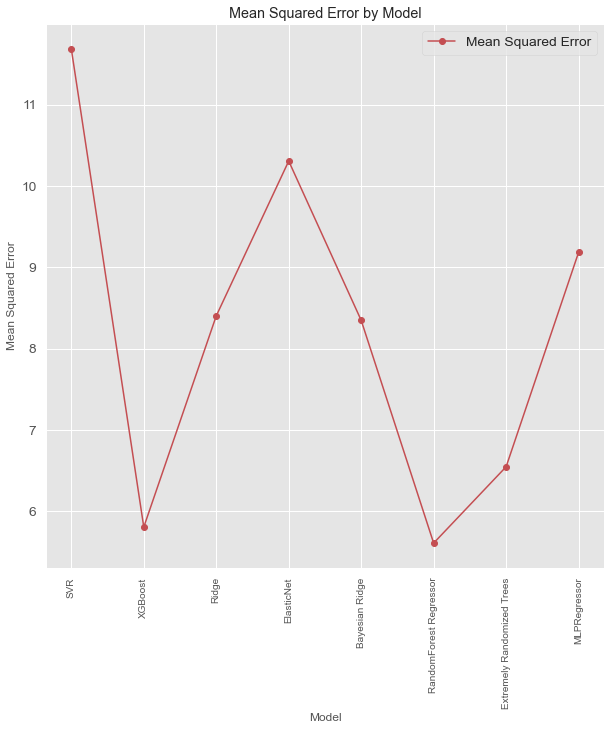

In [193]:
# Line plot of the mean squared error for each model evaluated
plt.style.use('ggplot')
plt.figure(figsize=(8, 8))
df_results.plot("Model", "Mean Squared Error",color='r',marker='o')
plt.xticks(fontsize=10, rotation=90)
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error by Model')
plt.show()

<Figure size 576x576 with 0 Axes>

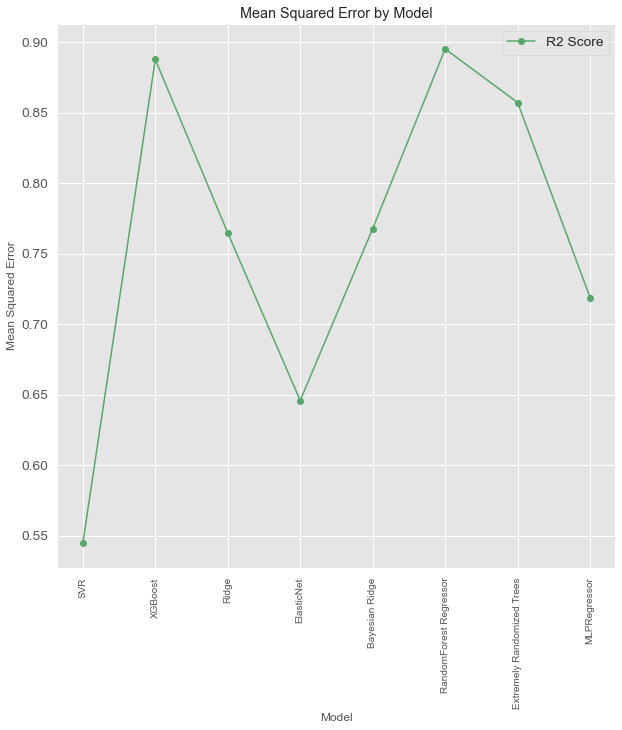

In [194]:
# Line plot of the r2 score for each evaluated model
plt.style.use('ggplot')
plt.figure(figsize=(8, 8))
df_results.plot("Model", "R2 Score",color='g',marker='o')
plt.xticks(fontsize=10, rotation=90)
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error by Model')
plt.show()

In [127]:
# Perform cross validation on all models under consideration based on R2 score
cv_r2_score = []
cv = KFold(n_splits=10, random_state=5, shuffle=True)
for name,model in models.items():
    cv = KFold(n_splits=10, random_state=5, shuffle=True)
    cv_scores = cross_val_score(model, x_train, y_train, n_jobs=-1, cv=cv, scoring="r2")
    cv_r2_score.append(np.mean(cv_scores))
    print(f'{name} : {np.mean(cv_scores)}')

SVR : 0.5341917444237263
XGBoost : 0.8879920161809718
Ridge : 0.7817339926875787
ElasticNet : 0.6480004668007551
SGD : -103434.26529583838
Bayesian Ridge : 0.7814307046707298
Linear Regression : -7.378240013651711e+22
RandomForest Regressor : 0.8771513305165721
Extremely Randomized Trees : 0.8647682638225014
MLPRegressor : 0.7648592376351601


In [128]:
# Create a stacking ensemble learner by using the 3 highest performing models
level0 = list()
level0.append(('XGBoost', XGBRegressor(random_state=5)))
level0.append(('Extremely Randomized Trees', ExtraTreesRegressor(random_state=5)))
# define meta learner model
level1 = RandomForestRegressor(random_state=5)
# define the stacking ensemble
stack_model = StackingRegressor(estimators=level0, final_estimator=level1, cv=cv)
# fit the model on all available data
stack_model.fit(x_train, y_train)
predicted = stack_model.predict(x_test)
mse_score = np.sqrt(mean_squared_error(y_test, predicted))
r2_score_eval = r2_score(y_test, predicted)
print(f'{mse_score}: {r2_score_eval}')

6.166266719094921: 0.8733455870136935


In [245]:
# Using GridSearch to optimize the hyper-parameters in the Random Forest Regression Model
n_estimators = [100, 200, 400, 800, 1200]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [10, 20, 30, 40, 50]
min_samples_split = [2, 3, 5, 10, 20]
min_samples_leaf = [1, 2, 4, 8, 15]

grid_param = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

cv = KFold(n_splits=10, random_state=5, shuffle=True)              
rf_model = RandomForestRegressor(random_state=5)
tune_rf_params = GridSearchCV(rf_model, grid_param, scoring="r2", n_jobs=-1, cv=cv)
tune_rf_params.fit(x_train, y_train)

print("Parameter setting that gave the best results on the hold out data: ", tune_rf_params.best_params_)
print("Mean cross-validated r2 score of the best_estimator: ", tune_rf_params.best_score_)

Parameter setting that gave the best results on the hold out data:  {'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}
Mean cross-validated r2 score of the best_estimator:  0.8821732017526672


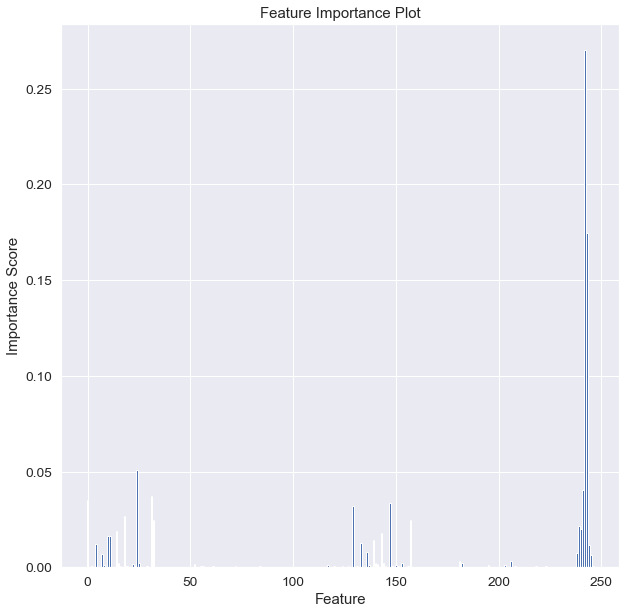

In [285]:
# Plot the importance of the dataset features used to train the model
rf_model1 = RandomForestRegressor(n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features='auto', max_depth=40, random_state=5)
rf_model1.fit(x_train, y_train)
importance = rf_model1.feature_importances_

plt.bar([x for x in range(len(importance))], importance)
plt.title("Feature Importance Plot")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.style.use("ggplot")
plt.show()

In [130]:
# Display the top 25 most important features based on the optimised model
fs_results = pd.DataFrame([x_train.columns, importance])
fs_results = fs_results.transpose()
fs_results = fs_results.rename(columns={0:'Feature', 1:'Importance Score'}).sort_values(by=['Importance Score'], ascending=False)
print(fs_results.head(25))

                     Feature Importance Score
242          Altitude_Metres         0.270364
243    Fastest_Lap_Speed_KMH         0.174665
24              Race_Name_25         0.050738
241        Avg_Pit_Stop_Secs         0.040182
31              Race_Name_32         0.037305
0                Race_Name_1          0.03522
147          Circuit_Name_19         0.033499
129           Circuit_Name_1         0.031809
18              Race_Name_19         0.026665
157          Circuit_Name_29         0.024872
32              Race_Name_33         0.024664
239            Pitted_On_Lap         0.021764
240        Pit_Stop_Duration         0.019787
14              Race_Name_15          0.01901
143          Circuit_Name_15         0.017709
11              Race_Name_12          0.01657
10              Race_Name_11         0.016235
139          Circuit_Name_11         0.014369
133           Circuit_Name_5         0.012767
4                Race_Name_5         0.012208
244      Driver_Total_Points      

In [131]:
# Alternative method to get the most important features from a trained model
selector = SelectFromModel(rf_model1)
selector = selector.fit(x_train, y_train) 
status = selector.get_support()
features = np.array(x_train.columns)
  
print("Selected features:")
print(features[status])

Selected features:
['Race_Name_1' 'Race_Name_5' 'Race_Name_8' 'Race_Name_11' 'Race_Name_12'
 'Race_Name_15' 'Race_Name_19' 'Race_Name_25' 'Race_Name_32'
 'Race_Name_33' 'Circuit_Name_1' 'Circuit_Name_5' 'Circuit_Name_8'
 'Circuit_Name_11' 'Circuit_Name_15' 'Circuit_Name_19' 'Circuit_Name_29'
 'Pit_Stop_Count' 'Pitted_On_Lap' 'Pit_Stop_Duration' 'Avg_Pit_Stop_Secs'
 'Altitude_Metres' 'Fastest_Lap_Speed_KMH' 'Driver_Total_Points'
 'Driver_Overall_Standing']


In [199]:
# Create a dataframe of only the most important features
selected_feat_df = data_copy[['Race_Name', 'Circuit_Name', 'Pit_Stop_Count', 'Pitted_On_Lap', 'Pit_Stop_Duration', 
                              'Avg_Pit_Stop_Secs', 'Altitude_Metres', 'Fastest_Lap_Speed_KMH', 'Driver_Total_Points', 
                              'Driver_Overall_Standing']]
selected_feat_df.head()

,Race_Name,Circuit_Name,Pit_Stop_Count,Pitted_On_Lap,Pit_Stop_Duration,Avg_Pit_Stop_Secs,Altitude_Metres,Fastest_Lap_Speed_KMH,Driver_Total_Points,Driver_Overall_Standing
0,1,1,2.0,25,28.742,28,18,163.508,66,8
1,2,2,2.0,30,21.539,21,3,189.206,53,11
2,3,3,5.0,45,20.285,20,103,212.450,18,13
3,2,2,2.0,38,22.315,22,3,189.615,106,8
4,4,4,1.0,15,22.011,22,678,224.327,18,13


In [201]:
selected_feat_df.dtypes

Race_Name                    int32
Circuit_Name                 int32
Pit_Stop_Count             float64
Pitted_On_Lap                int64
Pit_Stop_Duration          float64
Avg_Pit_Stop_Secs            int64
Altitude_Metres              int64
Fastest_Lap_Speed_KMH      float64
Driver_Total_Points          int64
Driver_Overall_Standing      int64
dtype: object

In [206]:
selected_feat_df["Race_Name"] = selected_feat_df["Race_Name"].astype(object)
selected_feat_df["Circuit_Name"] = selected_feat_df["Circuit_Name"].astype(object)

cat_cols = []
num_cols = []
for i in selected_feat_df.columns:
    if selected_feat_df[i].dtype == object:
        cat_cols.append(i)
    else:
        num_cols.append(i)

In [208]:
# Tranform the categorical variables of the training data using OneHotEncoder() and save the transformation object for 
# future use in the app
import pickle
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(selected_feat_df[cat_cols])

# Saving transformer to disk
pickle.dump(encoder, open('encoder.pkl','wb'))

encoded_cols = list(encoder.get_feature_names(cat_cols))
selected_feat_df[encoded_cols] = encoder.transform(selected_feat_df[cat_cols])
selected_feat_df = selected_feat_df[encoded_cols + num_cols]

In [289]:
# Train random forest regression model, and save it as a model object for future use in the app
x_train2, x_test2, y_train2, y_test2 = train_test_split(selected_feat_df, target_df, test_size=0.25, random_state=42)
pred_model = rf_model1.fit(x_train2, y_train2)
# Saving transformer to disk
pickle.dump(pred_model, open('pred_model.pkl','wb'))

In [286]:
# Evaluate the performance of the model
predicted = pred_model.predict(x_test2)
rmse_score = np.sqrt(mean_squared_error(y_test2, predicted))
model_r2_score = r2_score(y_test2, predicted)
print(f'Root Mean Squared Error: {rmse_score} : R2 Score: {model_r2_score}')

Root Mean Squared Error: 5.524412492911372 : R2 Score: 0.8983405134709053


In [288]:
# Exploring an altenative method of building and testing the random forest optimized model
selected_feat_dff = data_copy[['Race_Name', 'Circuit_Name', 'Pit_Stop_Count', 'Pitted_On_Lap', 'Pit_Stop_Duration', 'Avg_Pit_Stop_Secs', 'Altitude_Metres', 'Fastest_Lap_Speed_KMH', 'Driver_Total_Points', 'Driver_Overall_Standing']]

x_train2, x_test2, y_train2, y_test2 = train_test_split(selected_feat_dff, target_df, test_size=0.25, random_state=42)

class OHETransform(BaseEstimator):

    def __init__(self):
        pass

    def fit(self, documents, y=None):
        return self

    def transform(self, x):
        cat_cols = []
        num_cols = []
        for i in x.columns:
            if x[i].dtype == object:
                cat_cols.append(i)
            else:
                num_cols.append(i)
        encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(x[cat_cols])
        encoded_cols = list(encoder.get_feature_names(cat_cols))
        x[encoded_cols] = encoder.transform(x[cat_cols])
        x = x[encoded_cols + num_cols]
        
        return x
        
model_pipeline = Pipeline(steps=[('Encode Categorical Variables', OHETransform()), 
                                 ('random_forest', rf_model1)])
# fit the pipeline with the training data
model_pipeline.fit(x_train2, y_train2)

# predict target values on the training data
predicted = model_pipeline.predict(x_test2)
mse_score = mean_squared_error(y_test2, predicted)
r2_score1 = r2_score(y_test2, predicted)
print(f'Mean Squared Error: {mse_score} : R2 Score: {r2_score1}')

Mean Squared Error: 30.90816260525368 : R2 Score: 0.8970446539334416
